<a href="https://colab.research.google.com/github/wailbenelhassane/Customer-Segmentation/blob/main/Customer_Segmentation_with_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [29]:
customer_data = pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [30]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
customer_data.shape

(200, 5)

In [32]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Choosing the Annual Income Column & Spending Score Column

In [34]:
X = customer_data.iloc[:,[3,4]].values
print(X[1:5])

[[15 81]
 [16  6]
 [16 77]
 [17 40]]


Choosing the number of clusters using WCSS

In [35]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

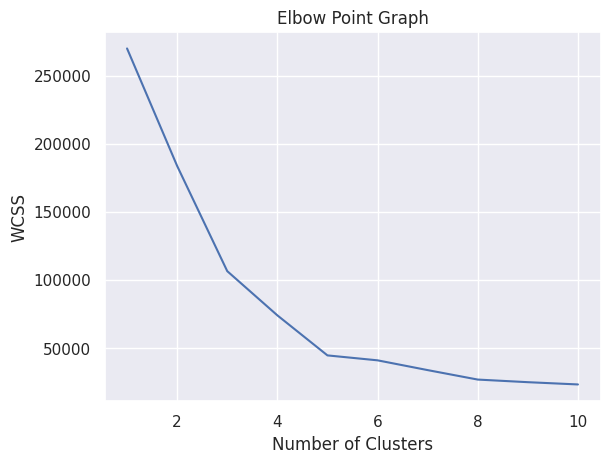

In [36]:
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
#There is no significant drop in the value after the elbow in five so thats the optimum value

Optimum Number of Cluster = 5

Training the k-Means Clustering Model

In [39]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#return a label for each datapoint based on their cluster

Y= kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Visualizing the Clusters

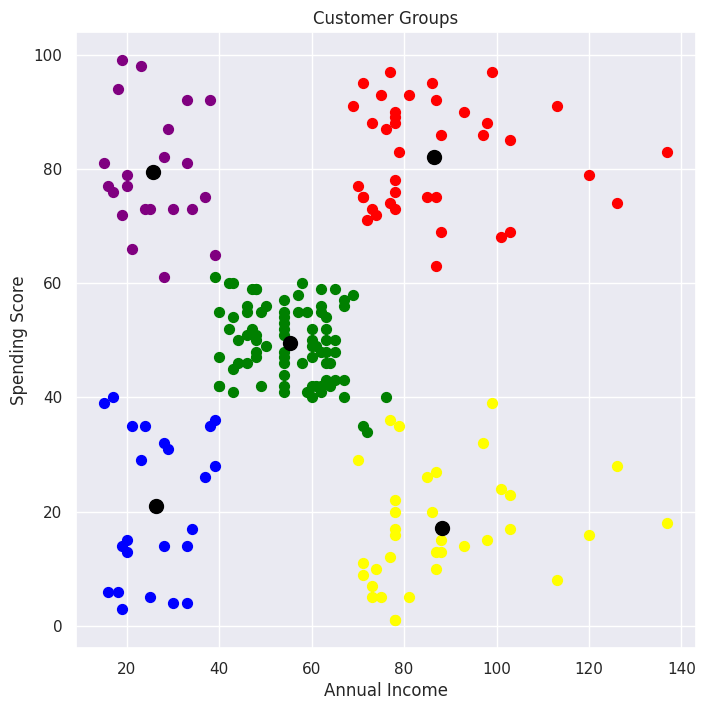

In [49]:

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c="green", label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c="red", label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c="yellow", label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c="blue", label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c="purple", label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="black", label="Centroid")
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


Customer Segmentation Analysis (KMeans - 5 Clusters)
The scatter plot represents customer segmentation based on Annual Income and Spending Score. The dataset appears to be divided into five distinct clusters, each representing a unique customer group:


*  Cluster 1 (Red):

  High income, high spending

  Represents premium customers who are likely loyal and spend generously.


 * Cluster 2 (Yellow):

  High income, low spending

  These are wealthy but conservative spenders—possibly need incentives or better marketing engagement.


 * Cluster 3 (Green):

  Average income, average spending

  The mainstream customer base, possibly price-sensitive and value-driven.


 * Cluster 4 (Blue):

  Low income, low spending

  Typically not highly profitable—represent a low-value segment.


 * Cluster 5 (Purple):

  Low income, high spending

  These customers show high enthusiasm despite limited income—may respond well to promotions but could pose risk.

The black dots represent the cluster centroids, indicating the center of each group.